In [ ]:
import os
os.getcwd()

## 1.88 wildfire dataset

In [ ]:
# https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/code?select=FPA_FOD_20170508.sqlite

import pandas
import sqlite3

filepath = 'datasets\wildfire_data\FPA_FOD_20170508.sqlite'

# sqlite random testing
con = sqlite3.connect(filepath)
cur = con.cursor()

# execute var
cursor = cur.execute('SELECT * FROM spatial_ref_sys_aux;')
names = list(map(lambda x: x[0], cursor.description))
print(names)

# The result of a "cursor.execute" can be iterated over by row
i = 0
for row in cursor:
    print(row)
    i += 1
    if i > 100:
        break

In [ ]:
#results: kinda a wash, that dataset is confusing

## USA+California Wildfire Data

In [8]:
# https://www.kaggle.com/datasets/avkashchauhan/california-wildfire-dataset-from-2000-2021?resource=download

import pandas
import sqlite3


filepath = 'datasets\wildfire_data\ca_wildfires\ca_daily_fire_2000_2021-v2.csv'
data = pandas.read_csv(filepath)

data1 = data.copy(deep=True)
# print(data.columns)
# data.drop(columns='Date', inplace=True)

In [60]:
import pandas as pd
%matplotlib inline

data1 = data.copy(deep=True)
print(data1.dtypes)
# convert date to date types
data1['acq_date'] = pd.to_datetime(data1['acq_date'])
# convert objects (categorical) into ordinal types
data1['satellite'] = data1['satellite'].map({'Terra': 1, 'Aqua': 2})
data1['instrument'] = data1['instrument'].map({'MODIS': 1, 'VIIRS':2})

# drop unnecessary data columns
data1.drop(columns=['year', 'month', 'type'], inplace=True)

print(data1.dtypes)
data1


latitude      float64
longitude     float64
acq_date       object
satellite      object
instrument     object
frp           float64
type            int64
bright_t31    float64
confidence      int64
year            int64
month           int64
dtype: object
latitude             float64
longitude            float64
acq_date      datetime64[ns]
frp                  float64
bright_t31           float64
confidence             int64
dtype: object


,latitude,longitude,acq_date,frp,bright_t31,confidence
0,32.4646,-114.6906,2011-06-29,91.1,315.7,84
1,32.4768,-114.6785,2011-10-11,96.2,313.7,100
2,32.4937,-114.7856,2013-02-06,26.9,296.1,65
3,32.4987,-114.7985,2010-02-04,22.2,282.9,62
4,32.5006,-114.7929,2009-07-08,172.0,316.4,78
...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,24.6,274.4,77
221179,41.9998,-120.7090,2012-08-13,74.1,310.7,97
221180,41.9998,-114.9167,2007-07-20,35.7,321.8,91
221181,41.9999,-123.5675,2018-07-30,18.2,295.8,62


In [61]:
# scratch
print(data1['frp'].nlargest(100))
# print(data1['instrument'].value_counts())
# data1.plot.hist(by=['frp'], bins=12)
data1['confidence'].mean()
data1['frp'].mean()
data1['frp'].median()
data1.groupby(data1['acq_date'].dt.year)['bright_t31'].mean()
# data1.groupby['bright_t31']
# data1
print(data1.count())
(data1['confidence'] > 70).sum()
# (data1['confidence'] == 60).sum()

# the mean is higher than the median meaning positively skewed
# meaning that there are some HUGE wildfires!

109928    11944.2
368       11800.8
449       11528.3
27983     11488.0
27804     11486.3
           ...   
9595       5553.4
30996      5552.7
30304      5531.4
101812     5527.5
142352     5498.6
Name: frp, Length: 100, dtype: float64
latitude      221183
longitude     221183
acq_date      221183
frp           221183
bright_t31    221183
confidence    221183
dtype: int64


163517

In [59]:
# I want to reduce columns so I am going to only keep confidence >75
data1 = data1[data1['confidence'] > 75]
data1.count()

# since the data here is not grouped by dates
# am going to aggregate the mean frp for each day
# and have a count of frp as # of wildfires per day
# and also have mean of the bright_t31 values
# and sum the values of the ordinal data (satellites, instruments) and split these into columns based on encoding

# ORRRR, should i just expand the values of the other dataset to fit here and just duplicate them??
# Procedures:
# 1. reduce rows in this dataset to be smaller, so can link to other by date
# 2. expand rows in other dataset to fit this one, so there are many duplicates of the temperature data

# data1['acq_date'].value_counts()
data1.groupby(data1['acq_date'])['frp'].mean()
data1.groupby(data1['acq_date'])['frp'].count()

acq_date
2000-11-02     5
2000-11-03     9
2000-11-05     2
2000-11-06     2
2000-11-07    21
              ..
2020-12-27     2
2020-12-28     6
2020-12-29     6
2020-12-30     6
2020-12-31     2
Name: frp, Length: 5282, dtype: int64

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

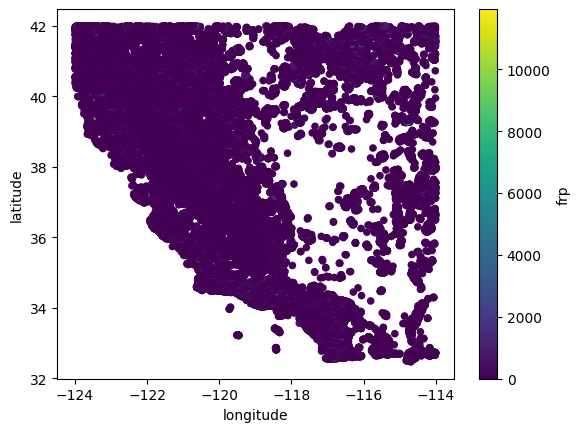

In [7]:
import matplotlib.pyplot as plt
data1.plot(x="longitude", y="latitude", kind="scatter", c="frp")


In [ ]:
import matplotlib.pyplot as plt

# need to convert date to datetime to do this
data['Date'] = pd.to_datetime(data['year'])

# plt.hist(la_df[' AvgTemperature'])
fig, ax = plt.subplots()
ax.bar(data['Date'], (data['type'].value_counts()))
ax.set_ylim([0,100])
plt.show()